In [241]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [242]:

# Load the BEAT WELL dataset
file_path = "/content/BEAT_WELL_BALANCED.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display dataset info and sample rows
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  93 non-null     int64  
 1   gender               93 non-null     int64  
 2   height_cm            93 non-null     int64  
 3   weight_kg            93 non-null     int64  
 4   bmi                  93 non-null     float64
 5   systolic_bp          93 non-null     int64  
 6   diastolic_bp         93 non-null     int64  
 7   bp_category          93 non-null     int64  
 8   smoking_status       93 non-null     int64  
 9   alcohol_consumption  93 non-null     int64  
 10  physical_activity    93 non-null     int64  
 11  cholesterol_level    93 non-null     int64  
 12  blood_sugar          93 non-null     int64  
 13  family_history       93 non-null     int64  
 14  risk_score           93 non-null     int64  
dtypes: float64(1), int64(14)
mem

In [243]:
# Define features and target
X = df.drop("risk_score", axis=1)  # Features
y = df["risk_score"]  # Target column

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and Testing Set Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


Training and Testing Set Shapes:
X_train: (74, 14), X_test: (19, 14)


In [244]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,         # Number of boosting rounds
    learning_rate=0.05,       # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    min_child_weight=1,       # Minimum sum of instance weight
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features used per tree
    random_state=42,
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)


In [245]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ Model Evaluation Metrics:
Accuracy: 0.8421
Precision: 0.8447
Recall: 0.8421
F1 Score: 0.8402

Confusion Matrix:
[[6 0 0]
 [0 4 2]
 [0 1 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      0.67      0.73         6
           2       0.75      0.86      0.80         7

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.84      0.84      0.84        19



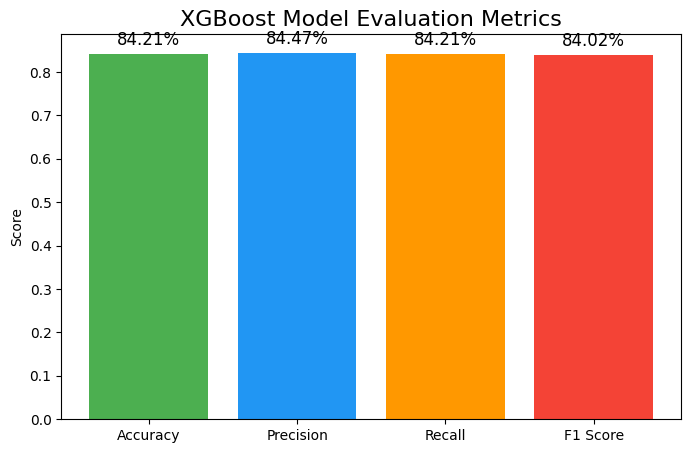

In [246]:
# Plotting accuracy
fig, ax = plt.subplots(figsize=(8, 5))

# Plot accuracy
ax.bar(["Accuracy", "Precision", "Recall", "F1 Score"],
       [accuracy, precision, recall, f1],
       color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])

# Display accuracy in percentage
for i, v in enumerate([accuracy, precision, recall, f1]):
    ax.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title("XGBoost Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score")
plt.show()


BALANCING


In [247]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/BEAT_WELL_BALANCED.csv')

# Display class distribution
print(df['risk_score'].value_counts())  # Change 'risk_score' if your target column has a different name


risk_score
2    31
1    31
0    31
Name: count, dtype: int64


In [248]:
print(df.isnull().sum())


age                    0
gender                 0
height_cm              0
weight_kg              0
bmi                    0
systolic_bp            0
diastolic_bp           0
bp_category            0
smoking_status         0
alcohol_consumption    0
physical_activity      0
cholesterol_level      0
blood_sugar            0
family_history         0
risk_score             0
dtype: int64


In [249]:
import pandas as pd

df = pd.read_csv('/content/BEAT_WELL_BALANCED.csv')
print(df['risk_score'].value_counts())  # replace with your actual target column if needed


risk_score
2    31
1    31
0    31
Name: count, dtype: int64


In [250]:
# Separate features and target
X = df.drop('risk_score', axis=1)  # Replace with your target column name if different
y = df['risk_score']

# One-hot encode categorical features (like gender, alcohol_consumption, etc.)
X_encoded = pd.get_dummies(X)


In [251]:
print(X_encoded.isnull().sum())


age                    0
gender                 0
height_cm              0
weight_kg              0
bmi                    0
systolic_bp            0
diastolic_bp           0
bp_category            0
smoking_status         0
alcohol_consumption    0
physical_activity      0
cholesterol_level      0
blood_sugar            0
family_history         0
dtype: int64


In [252]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print(y_train_bal.value_counts())  # Confirm balancing


risk_score
0    25
1    25
2    25
Name: count, dtype: int64


In [253]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print(y_train_bal.value_counts())  # Confirm balancing

# Create a new DataFrame with the balanced data
df_balanced = pd.DataFrame(X_train_bal, columns=X_train.columns)  # Use original column names
df_balanced['risk_score'] = y_train_bal  # Add the target variable back

# Now you can save it
df_balanced.to_csv("/content/BEAT_WELL_BALANCED.csv", index=False)

risk_score
0    25
1    25
2    25
Name: count, dtype: int64


In [254]:
# Assuming your balanced dataset is in df_balanced
df_balanced.to_csv("/content/BEAT_WELL_BALANCED.csv", index=False)


In [255]:
dataset.describe()

,age,gender,height_cm,weight_kg,bmi,systolic_bp,diastolic_bp,bp_category,smoking_status,alcohol_consumption,physical_activity,cholesterol_level,blood_sugar,family_history,risk_score
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,50.189964,0.333333,171.075269,76.598566,26.233636,136.250896,77.587814,1.867384,0.286738,3.577061,5.505376,219.964158,122.781362,0.318996,1.000000
std,12.338005,0.472252,13.553971,20.025617,4.165431,19.035790,14.066082,0.985677,0.453051,2.811905,2.679352,36.379279,37.199717,0.466925,0.817964
min,25.000000,0.000000,150.000000,50.000000,18.606181,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,150.000000,71.000000,0.000000,0.000000
25%,47.000000,0.000000,157.000000,58.500000,23.481626,124.000000,66.000000,1.000000,0.000000,1.000000,3.000000,199.000000,82.000000,0.000000,0.000000
50%,48.000000,0.000000,172.000000,68.000000,25.328153,129.000000,72.000000,2.000000,0.000000,4.000000,6.000000,224.000000,126.000000,0.000000,1.000000
75%,55.000000,1.000000,186.000000,94.500000,29.324908,151.000000,88.500000,3.000000,1.000000,5.000000,8.000000,234.500000,143.000000,1.000000,2.000000
max,79.000000,1.000000,189.000000,119.000000,34.822093,179.000000,109.000000,3.000000,1.000000,9.000000,9.000000,299.000000,197.000000,1.000000,2.000000


In [256]:
dataset["risk_score"].describe()

,risk_score
count,279.000000
mean,1.000000
std,0.817964
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


risk_score
2    93
0    93
1    93
Name: count, dtype: int64


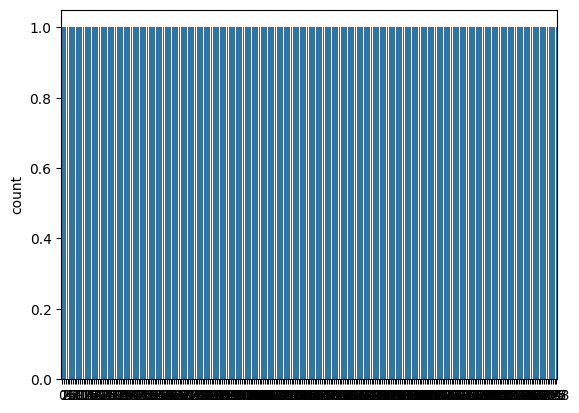

In [257]:
y = dataset["risk_score"]

sns.countplot(y)


target_temp = dataset["risk_score"].value_counts() # Change 'target' to 'risk_score'

print(target_temp)

<Axes: xlabel='gender', ylabel='risk_score'>

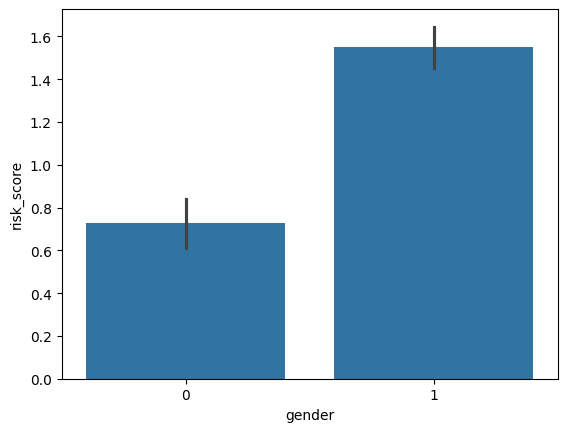

In [258]:
sns.barplot(x=dataset["gender"], y=y)

In [259]:
# sns.barplot(dataset["cp"],y)

In [260]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Assuming 'y_train' is the correct variable name for your training target
lr.fit(X_train, y_train)  # Change 'Y_train' to 'y_train'

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)  # Changed Y_train to y_train
Y_pred_knn = knn.predict(X_test)

In [262]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train) # Changed Y_train to y_train
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2) # Changed Y_test to y_test
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train) # Changed Y_train to y_train
Y_pred_rf = rf.predict(X_test)

In [263]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "xgb_model.pkl")

# Save the fitted StandardScaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved as xgb_model.pkl and scaler.pkl")

✅ Model and Scaler saved as xgb_model.pkl and scaler.pkl
